<a href="https://colab.research.google.com/github/yongsa-nut/TU_CN240_DataScience_671/blob/main/Lecture_7_Advance_Pandas_and_Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lecture 7 - Advanced Pandas and Web Scraping

## Overview
- Custom Sort
- Apply and Map
- groupby.filter
- Missing data
- Web Scraping

## Custom Sorting

- We want to sort the DataFrame by something not in our df.
- Example: sort by the data by the length of name.

In [2]:
import pandas as pd
from plotnine import *

In [3]:
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
babynames = pd.read_csv('babyname_CA.TXT', names = field_names)
babynames.head()

,State,Sex,Year,Name,Count
0,CA,F,1910,Mary,295
1,CA,F,1910,Helen,239
2,CA,F,1910,Dorothy,220
3,CA,F,1910,Margaret,163
4,CA,F,1910,Frances,134


### Approach 1: Create a temporary column

In [4]:
# Create a Series of the length of each name
babyname_lengths = babynames["Name"].str.len()

# Add a column named "name_lengths" that includes the length of each name
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [5]:
# Sort by the temporary column
babynames = babynames.sort_values(by="name_lengths", ascending=False)
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
341130,CA,M,1997,Ryanchristopher,5,15
348093,CA,M,2000,Franciscojavier,6,15
331124,CA,M,1993,Ryanchristopher,5,15
337819,CA,M,1996,Franciscojavier,8,15
317627,CA,M,1988,Franciscojavier,10,15


In [6]:
# Drop the 'name_lengths' column
babynames = babynames.drop("name_lengths", axis="columns")
babynames.head(5)

,State,Sex,Year,Name,Count
341130,CA,M,1997,Ryanchristopher,5
348093,CA,M,2000,Franciscojavier,6
331124,CA,M,1993,Ryanchristopher,5
337819,CA,M,1996,Franciscojavier,8
317627,CA,M,1988,Franciscojavier,10


### Approach 2: Sorting using the `key` argument

- `sort_values()` has an argument `key` that you can pass a function to it.
- Apply the `key` function to the values before sorting.
- The key function should be vectorized.
- It should expect a `Series` and return a `Series` with the same shape as the input.
- It will be applied to each column in by independently.

In [7]:
# lambda is an anonymous function
# Syntax: lambda arguments : expression
# The expression is executed and the result is returned

babynames.sort_values(by="Name", key=lambda x:x.str.len(), ascending=False).head()

,State,Sex,Year,Name,Count
341130,CA,M,1997,Ryanchristopher,5
325441,CA,M,1991,Ryanchristopher,7
348093,CA,M,2000,Franciscojavier,6
331009,CA,M,1993,Johnchristopher,5
316193,CA,M,1987,Franciscojavier,5


### Approach 3: Sorting Using the `map` function

- We can use the Python `map` function (`Series.map`) to map each element in `Series` to a function.

- Example: Sory by the number of times `dr` or `ea` appear

In [8]:
# First, define a function to count the number of times "dr" or "ea" appear in each name
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

# Then, use `map` to apply `dr_ea_count` to each name in the "Name" column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

# Sort the DataFrame by the new "dr_ea_count" column so we can see our handiwork
babynames = babynames.sort_values(by="dr_ea_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,dr_ea_count
101982,CA,F,1986,Deandrea,6,3
115965,CA,F,1990,Deandrea,5,3
108738,CA,F,1988,Deandrea,5,3
131037,CA,F,1994,Leandrea,5,3
311780,CA,M,1985,Deandrea,6,3


In [9]:
# Drop the `dr_ea_count` column
babynames = babynames.drop("dr_ea_count", axis="columns")
babynames.head(5)

,State,Sex,Year,Name,Count
101982,CA,F,1986,Deandrea,6
115965,CA,F,1990,Deandrea,5
108738,CA,F,1988,Deandrea,5
131037,CA,F,1994,Leandrea,5
311780,CA,M,1985,Deandrea,6


### `map` and `apply`

- pandas provides two ways - `map` and `apply` - to apply a function to each element in Series/DataFrame.

The major differences are:

- **Definition**
  - `map` is defined on `Series` only
  - `apply` is defined on `Series` and `DataFrame`
- **Input argument**
  - `map` accepts `dict`, `Series`, or callable
  - `apply` accept callable only
- **Behavior**
  - `map` is elementwise for `Series`
  - `apply` also works elementwise but is suited to more complex operations and aggregation. The behaviour and return value depends on the function.



In [10]:
# Use apply instead
babynames["dr_ea_count"] = babynames["Name"].apply(dr_ea_count)

# Sort the DataFrame by the new "dr_ea_count" column so we can see our handiwork
babynames = babynames.sort_values(by="dr_ea_count", ascending=False)
babynames.head()

,State,Sex,Year,Name,Count,dr_ea_count
101982,CA,F,1986,Deandrea,6,3
108738,CA,F,1988,Deandrea,5,3
131037,CA,F,1994,Leandrea,5,3
311780,CA,M,1985,Deandrea,6,3
115965,CA,F,1990,Deandrea,5,3


In [ ]:
# Drop the `dr_ea_count` column
babynames = babynames.drop("dr_ea_count", axis="columns")
babynames.head(5)

### Map/Apply Examples

- Mapping a category variable to number

In [15]:
likert_data = pd.Series(['Agree','Agree','Disagree','Neutral','Strongly Disagree','Strongly Agree'])
likert_data

,0
0,Agree
1,Agree
2,Disagree
3,Neutral
4,Strongly Disagree
5,Strongly Agree


In [16]:
mapping = {'Strongly Disagree':1, 'Disagree':2,'Neutral':3,'Agree':4,'Strongly Agree':5}
likert_num_data = likert_data.map(mapping)
likert_num_data

,0
0,4
1,4
2,2
3,3
4,1
5,5


- Converting multiple string variables to int

In [18]:
dates = pd.read_csv('/content/dates.csv')
dates.head()

,id,Month,Day,Year,Hour,Minute,Second
0,46243185,May,29,2012,9,40,58
1,73522879,May,18,2011,22,42,40
2,29296500,August,15,2012,0,9,2
3,49799724,July,1,2011,22,12,37
4,20739032,January,18,2012,1,20,28


In [ ]:
cols = ['Day','Year','Hour','Minute','Second']
dates[cols] = dates[cols].apply(pd.to_numeric)
dates.head()

In [25]:
# apply with lambda
dates[cols] = dates[cols].apply(lambda x: x.astype('int'))

In [23]:
# You can just do it like this nowadays.
dates[cols] = dates[cols].astype('int')

- Transform data

In [26]:
dates['second_square'] = dates['Second'].apply(lambda x: x**2)
dates.head()

,id,Month,Day,Year,Hour,Minute,Second,second_square
0,46243185,May,29,2012,9,40,58,3364
1,73522879,May,18,2011,22,42,40,1600
2,29296500,August,15,2012,0,9,2,4
3,49799724,July,1,2011,22,12,37,1369
4,20739032,January,18,2012,1,20,28,784


- `apply` can be used with `groupby`
- The function passed through `apply` must take a `DataFrame` as an argument. It can return a `DataFrame`, `Series`, or scalar.

In [36]:
# Do the max() -> return a Series
dates[['Year','Second']].groupby('Year').apply(lambda x: x.max())

,Year,Second
Year,,
2006,2006,58
2007,2007,45
2008,2008,54
2009,2009,33
2010,2010,59
2011,2011,59
2012,2012,59
2013,2013,59


In [39]:
# Calculate sum of square
dates[['Year','Second']].groupby('Year').apply(lambda x: (x['Second']**2).sum())

,0
Year,
2006,3364
2007,2530
2008,9104
2009,1089
2010,564044
2011,1074750
2012,1338325
2013,1362289


In [78]:
# Calculate percentage
test = pd.DataFrame({'Year':[1,1,1,2,2,2],
                     'Count':[1,2,3,4,5,6]})
percentage_per_year = test.groupby('Year').apply(
                                    lambda x: x['Count']/(x['Count'].sum()))
percentage_per_year

Year   
1     0    0.166667
      1    0.333333
      2    0.500000
2     3    0.266667
      4    0.333333
      5    0.400000
Name: Count, dtype: float64

In [65]:
percentage_per_year = percentage_per_year.reset_index()
percentage_per_year

,Year,level_1,Count
0,1,0,0.166667
1,1,1,0.333333
2,1,2,0.500000
3,2,3,0.266667
4,2,4,0.333333
5,2,5,0.400000


In [67]:
percentage_per_year = percentage_per_year.rename({'level_1':'ID','Count':'Percentage'}, axis=1)
percentage_per_year

,Year,ID,Percentage
0,1,0,0.166667
1,1,1,0.333333
2,1,2,0.500000
3,2,3,0.266667
4,2,4,0.333333
5,2,5,0.400000


### Percentage with `groupby.transform`
- Another (easier) way is to create a `sum` column first and then divide the `count` by `sum`.
- `.transform` is similar to `.agg` but it will broadcast the result back to every row in the group.

In [73]:
test.groupby('Year').agg('sum')

,Count
Year,
1,6
2,15


In [75]:
test.groupby('Year').transform('sum')

,Count
0,6
1,6
2,6
3,15
4,15
5,15


In [79]:
# percentage
test['total'] = test.groupby('Year').transform('sum')
test['percentage'] = test['Count']/test['total']
test

,Year,Count,total,percentage
0,1,1,6,0.166667
1,1,2,6,0.333333
2,1,3,6,0.500000
3,2,4,15,0.266667
4,2,5,15,0.333333
5,2,6,15,0.400000


### Aside: Ploting Percentage Data
- How should we plot the percentage data? Barplot
- We want y-axis to be percentage but the default barplot has count as y-axis.
- We need to add an argument `stat='identity'` to `geom_bar()`

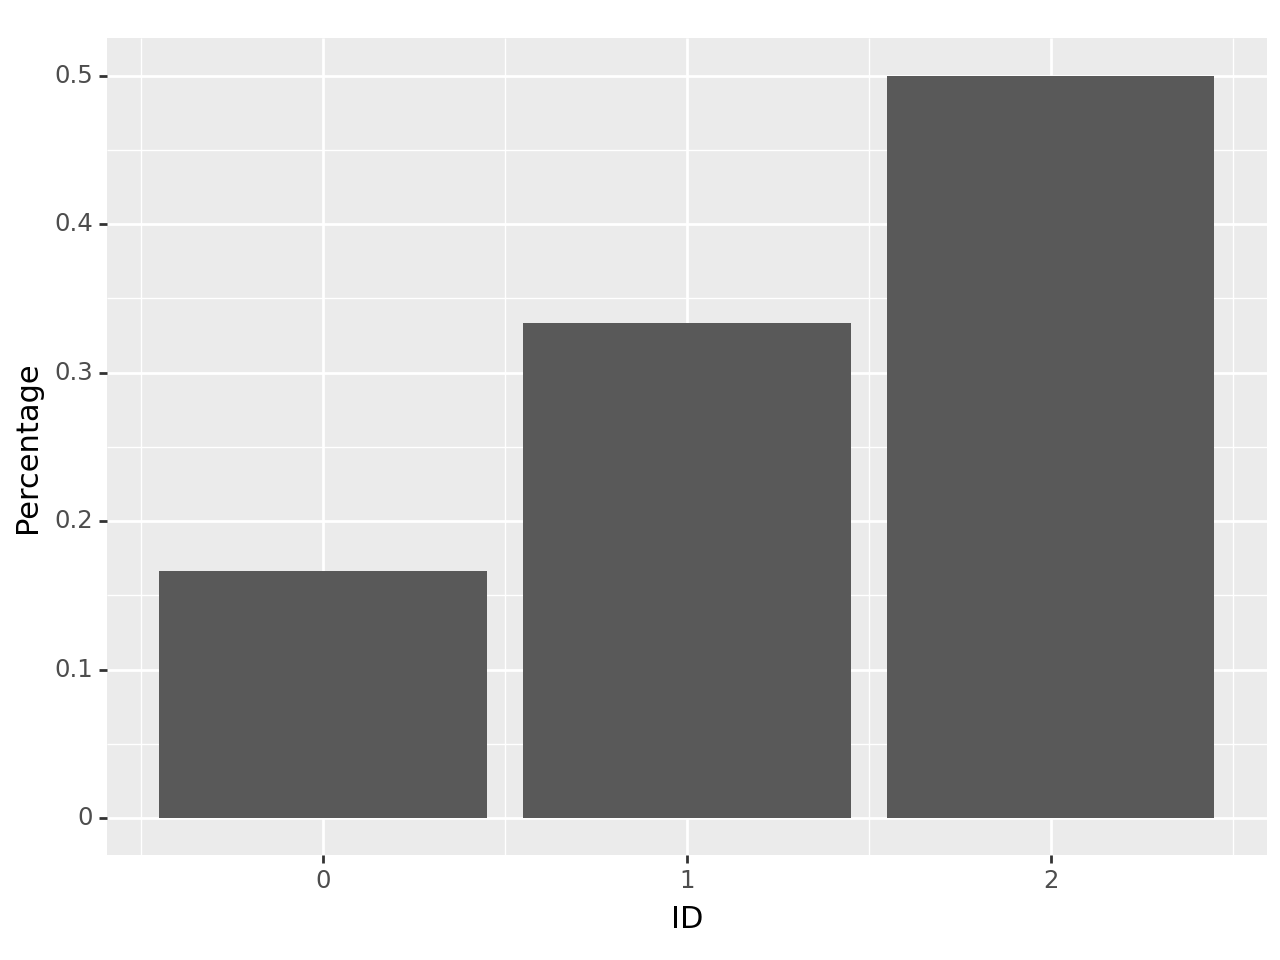

<Figure Size: (640 x 480)>

In [70]:
ggplot(percentage_per_year[percentage_per_year['Year']==1],
       aes(x='ID', y='Percentage')) + geom_bar(stat='identity')

## `groupby.filter`

- If you want to filer your data within group, you can use `groupby.filter`
- func is a function that:
  - Takes a DataFrame as input.
  - Returns either **True** or **False**.
- filter applies func to each group/sub-DataFrame:
  - If func returns **True** for a group, then all rows belonging to the group are **preserved**.
  - If func returns **False** for a group, then all rows belonging to that group are **filtered out**.
- Notes:
  - Filtering is done per group, not per row. Different from boolean filtering.
  - Unlike agg(), the column we grouped on does NOT become the index!


### `groupby.filter` Example: Filter out short names

- We want to filter out years that have more than 10000 babies

In [35]:
few_babies = babynames.groupby('Year').filter(lambda x: x['Count'].sum() < 10000 )
few_babies['Year'].unique()

array([1911, 1910])

## Missing Data

- Missing Data can come in many ways.
- The good one you know it's immiediately (`NaN`)
- However, in many cases, you have to **explore** the data.
- We will be working a dataset about CO2 level from Mauna Loa Observatory since 1958 ([website](https://gml.noaa.gov/ccgg/trends/data.html))
- This example will highlight issues about missing data and how to deal with.

### Reading the data

- This data is weird.
- It's not a csv and values are separated by white spaces.
- We will need to do some extra cleaning works.

In [80]:
co2 = pd.read_csv(
    '/content/co2_mm_mlo.txt',
    header = None,     # Do not add any header
    comment = "#",     # ignore lines begin with #
    sep = r'\s+'       # delimiter for continuous whitespace in regex
)
co2.head()

,0,1,2,3,4,5,6
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


### Exploring Variable Feature Types

- Let's go back to the raw data file to identify each feature.

- We'll rerun pd.read_csv, but this time with some custom column names.

In [4]:
co2 = pd.read_csv(
    '/content/co2_mm_mlo.txt',
    header = None,     # Do not add any header
    comment = "#",     # ignore lines begin with #
    sep = r'\s+',       # delimiter for continuous whitespace in regex
    names = ['Yr', 'Mo', 'DecDate', 'Avg', 'Int', 'Trend', 'Days']
)
co2.head()

,Yr,Mo,DecDate,Avg,Int,Trend,Days
0,1958,3,1958.208,315.71,315.71,314.62,-1
1,1958,4,1958.292,317.45,317.45,315.29,-1
2,1958,5,1958.375,317.50,317.50,314.71,-1
3,1958,6,1958.458,-99.99,317.10,314.85,-1
4,1958,7,1958.542,315.86,315.86,314.98,-1


### Visualize CO2

- Let's check the data out!

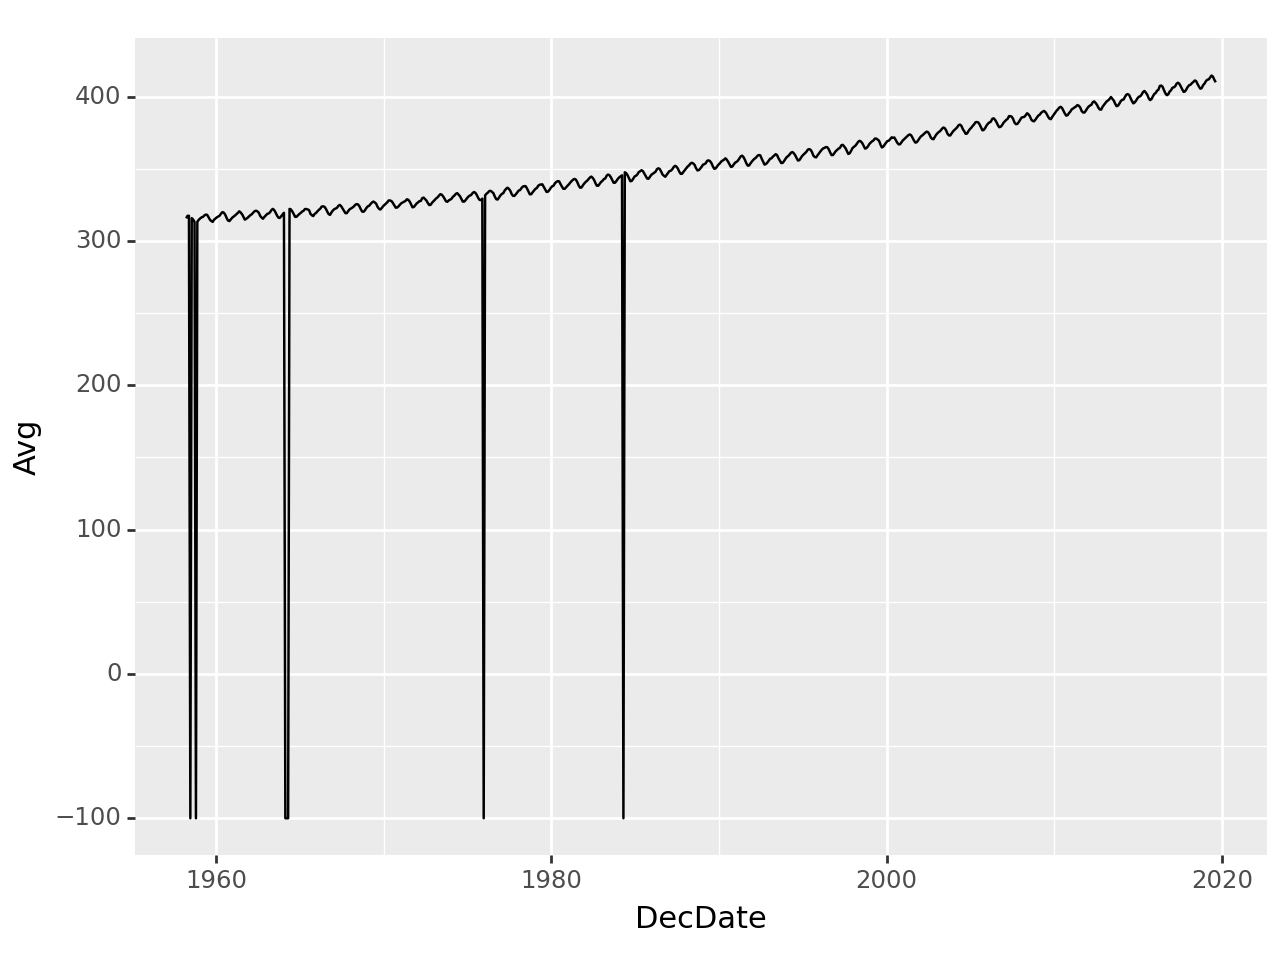

<Figure Size: (640 x 480)>

In [20]:
ggplot(co2, aes(x='DecDate', y ='Avg')) + geom_line()

- Plotting the data uncovered a problem. It looks like we have some **missing values**. What happened here?

In [ ]:
co2.head()

In [84]:
co2[co2['Avg'] < 0]

,Yr,Mo,DecDate,Avg,Int,Trend,Days
3,1958,6,1958.458,-99.99,317.10,314.85,-1
7,1958,10,1958.792,-99.99,312.66,315.61,-1
71,1964,2,1964.125,-99.99,320.07,319.61,-1
72,1964,3,1964.208,-99.99,320.73,319.55,-1
73,1964,4,1964.292,-99.99,321.77,319.48,-1
213,1975,12,1975.958,-99.99,330.59,331.60,0
313,1984,4,1984.292,-99.99,346.84,344.27,2


### Missing Data in CO2 dataset

- Some data have unusual values like -1 and -99.99.

- Let's check the description at the top of the file again.

  - -1 signifies a missing value for the number of days Days the equipment was in operation that month.
  - -99.99 denotes a missing monthly average Avg.

- This is a common practice where numbers are chosen to indicate **missing data**.
- How can we fix this? First, let's explore other aspects of our data.
- Understanding our data will help us decide what to do with the missing values.



### Sanity Checks: Reasoning about the data

- First, we consider the shape of the data. How many rows should we have?

- If chronological order, we should have one record per month.
- Data from March 1958 to August 2019.
- We should have $12\times(2019-1957)-2-4$ = 738 records.

In [85]:
co2.shape

(738, 7)

- Nice!! The number of rows (i.e. records) match our expectations.



## Understanding Missing Value 1: `Days`

- `Days` is a time field, so let's analyze other time fields to see if there is an explanation for missing values of days of operation.

- Let's start with **months** `Mo`.

- Are we missing any records? The number of months should have 62 or 61 instances (March 1957-August 2019).


In [5]:
co2["Mo"].value_counts().sort_index()

,count
Mo,
1,61
2,61
3,62
4,62
5,62
6,62
7,62
8,62
9,61


- As expected Jan, Feb, Sep, Oct, Nov, and Dec have 61 occurrences and the rest 62.



### Exploring: `Days`

- Next let's explore **days** `Days` itself, which is the number of days that the measurement equipment worked.

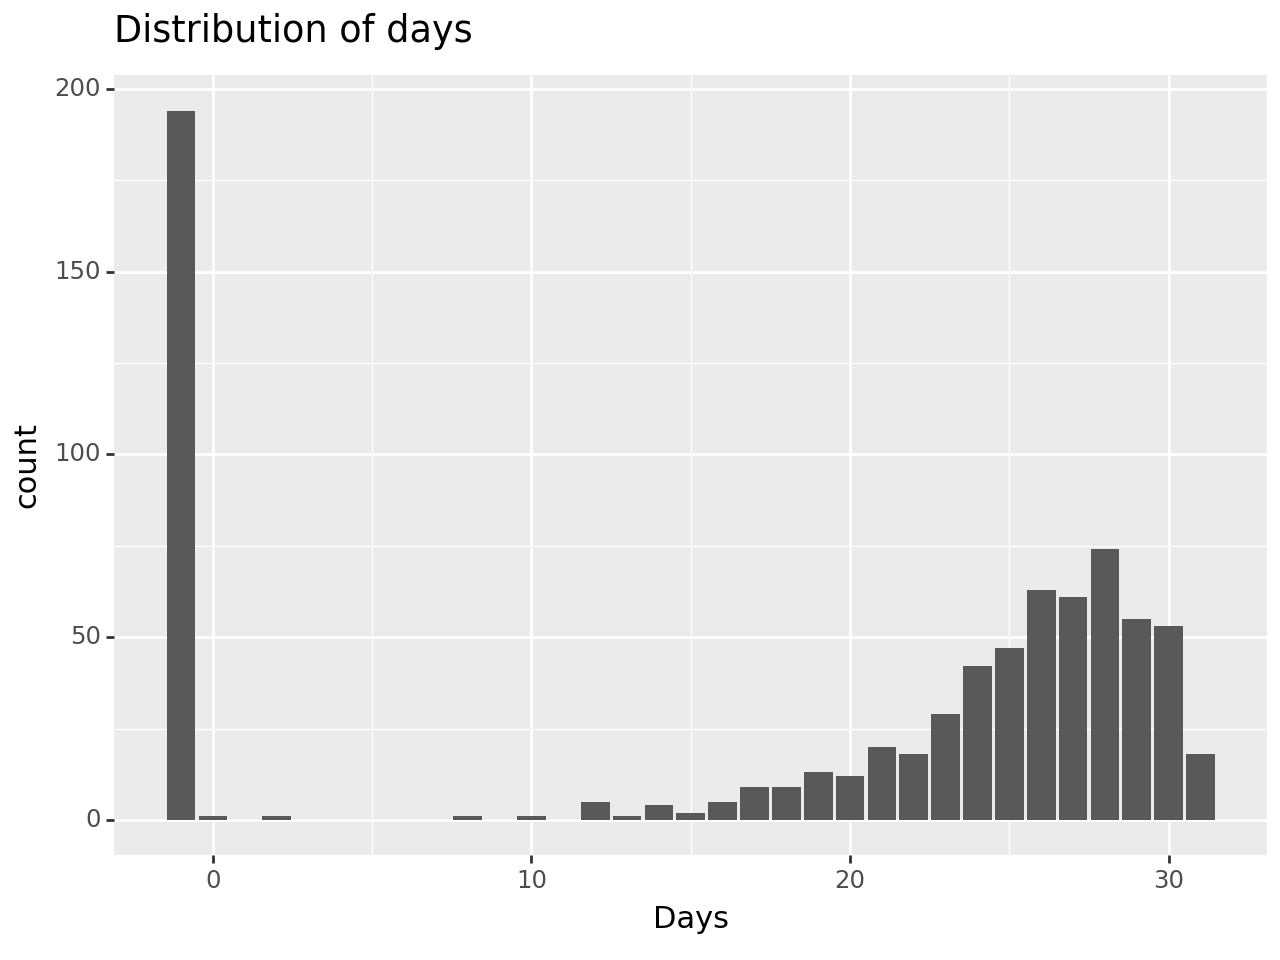

<Figure Size: (640 x 480)>

In [7]:
ggplot(co2, aes(x = 'Days')) + geom_bar() + ggtitle('Distribution of days')

- In terms of data quality, a handful of months have averages based on measurements taken on fewer than half the days.
- In addition, there are nearly 200 missing values--that's about 27% of the data!

#### Exploring: `Yr`

- Finally, let's check the last time feature, **year** `Yr`.

- Let's check to see if there is any connection between missingness and the year of the recording.

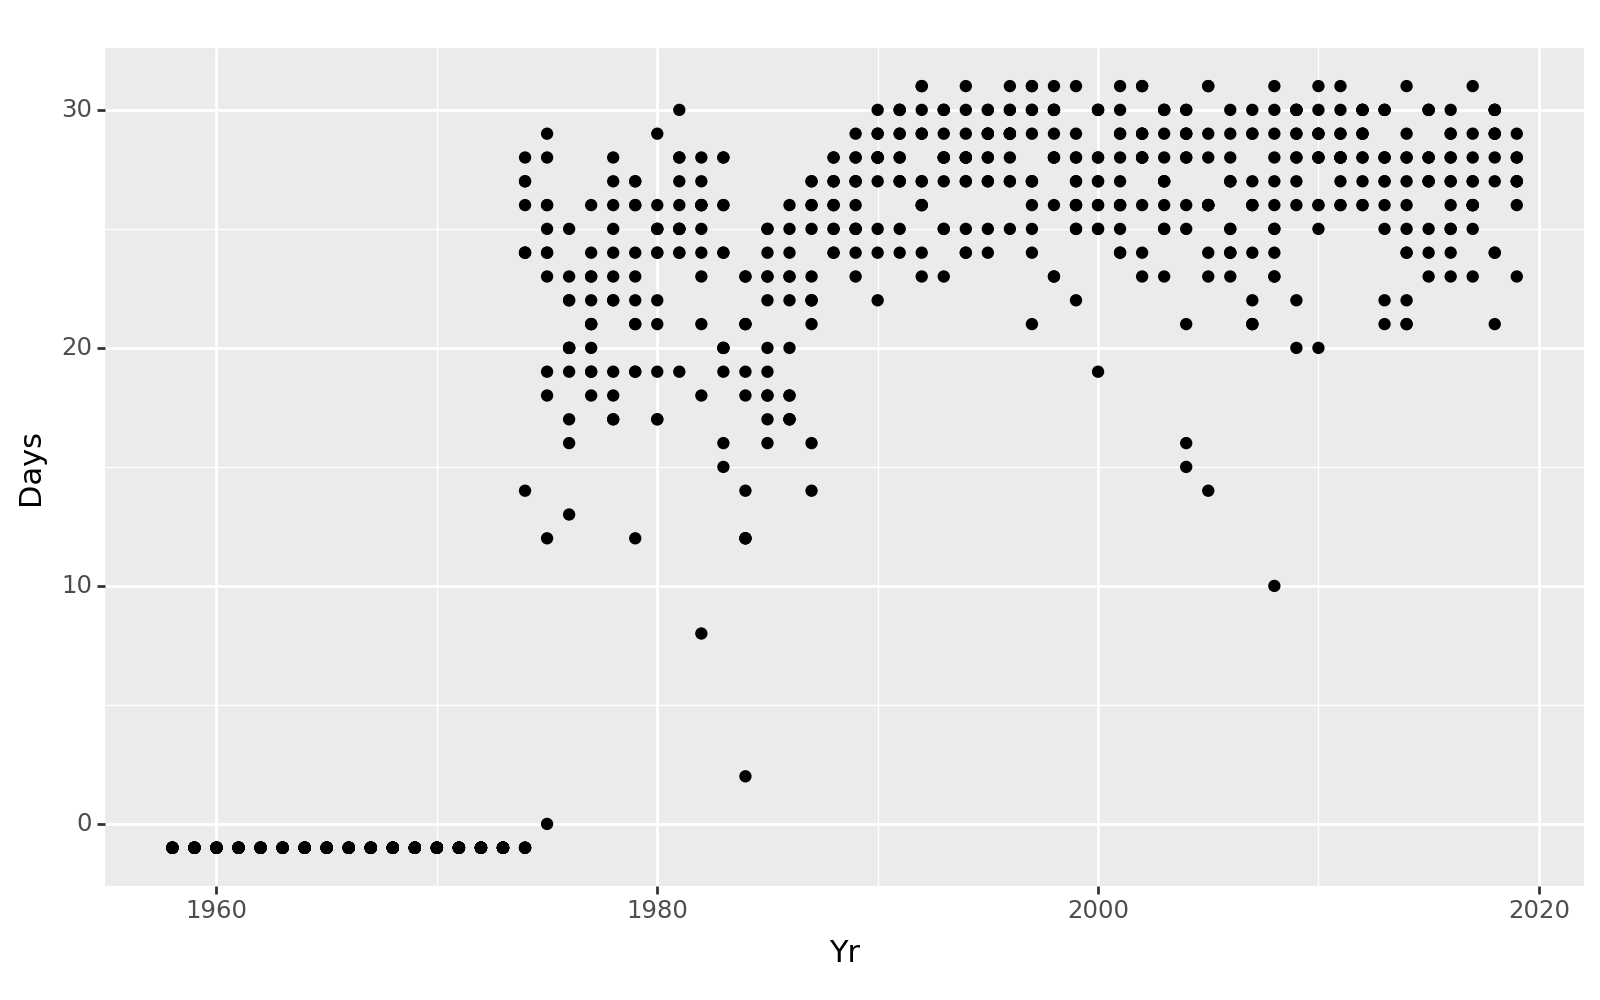

<Figure Size: (800 x 500)>

In [11]:
ggplot(co2, aes(x='Yr',y='Days')) + geom_point() + theme(figure_size=[8,5])

#### **Observation**: What did we learn?

- All of the missing data are in the early years of operation.

- This could be they didn't record days of operation until the mid 70s.

#### **Potential Next Steps:** What should we do next?

- Confirm these explanations through documentation about the historical readings.

- Maybe drop earliest recordings? However, we would want to delay such action until after we have examined the time trends and assess whether there are any potential problems.

### Understanding Missing Value 2: `Avg`

- Next, let's return to the -99.99 values in `Avg` to analyze the overall quality of the CO2 measurements.

/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 49'. Pick better value with 'binwidth'.


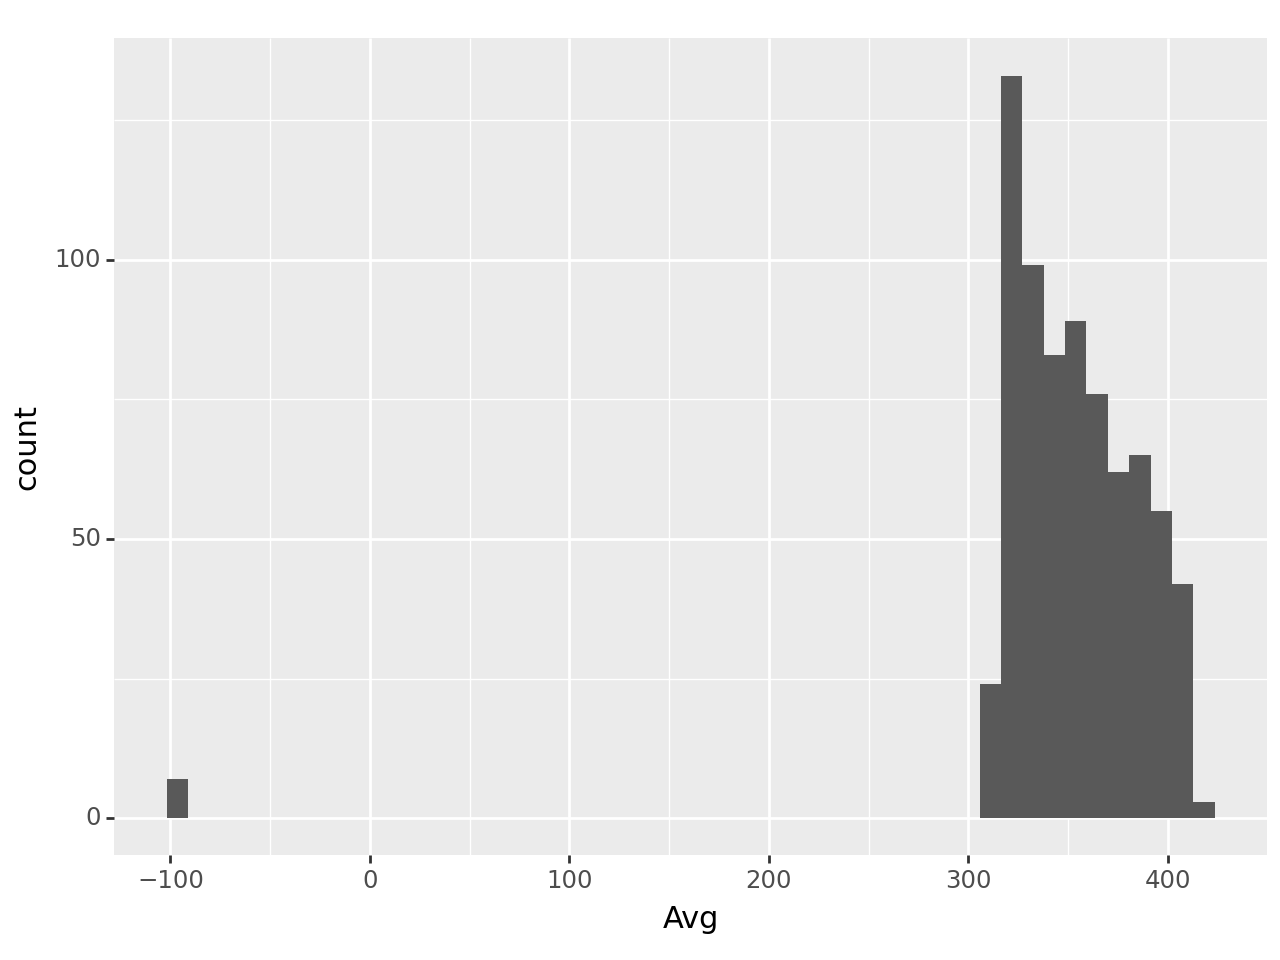

<Figure Size: (640 x 480)>

In [17]:
ggplot(co2, aes('Avg')) + geom_histogram()

#### What did we see?

- The non-missing values are in the 300-400 range (a regular range of CO2 levels).

- We also see that there are only a few missing Avg values (<1% of values). Let's examine all of them:

In [18]:
co2[co2["Avg"] < 0]

,Yr,Mo,DecDate,Avg,Int,Trend,Days
3,1958,6,1958.458,-99.99,317.10,314.85,-1
7,1958,10,1958.792,-99.99,312.66,315.61,-1
71,1964,2,1964.125,-99.99,320.07,319.61,-1
72,1964,3,1964.208,-99.99,320.73,319.55,-1
73,1964,4,1964.292,-99.99,321.77,319.48,-1
213,1975,12,1975.958,-99.99,330.59,331.60,0
313,1984,4,1984.292,-99.99,346.84,344.27,2


- There doesn't seem to be a pattern to these values, other than that most records also were missing `Days` data.

### Dealing with Missing Data

- How should we address the invalid Avg data?

  - A. Drop records

  - B. Set to NaN

  - C. Impute using some strategy

- Remember we want to fix the following plot:



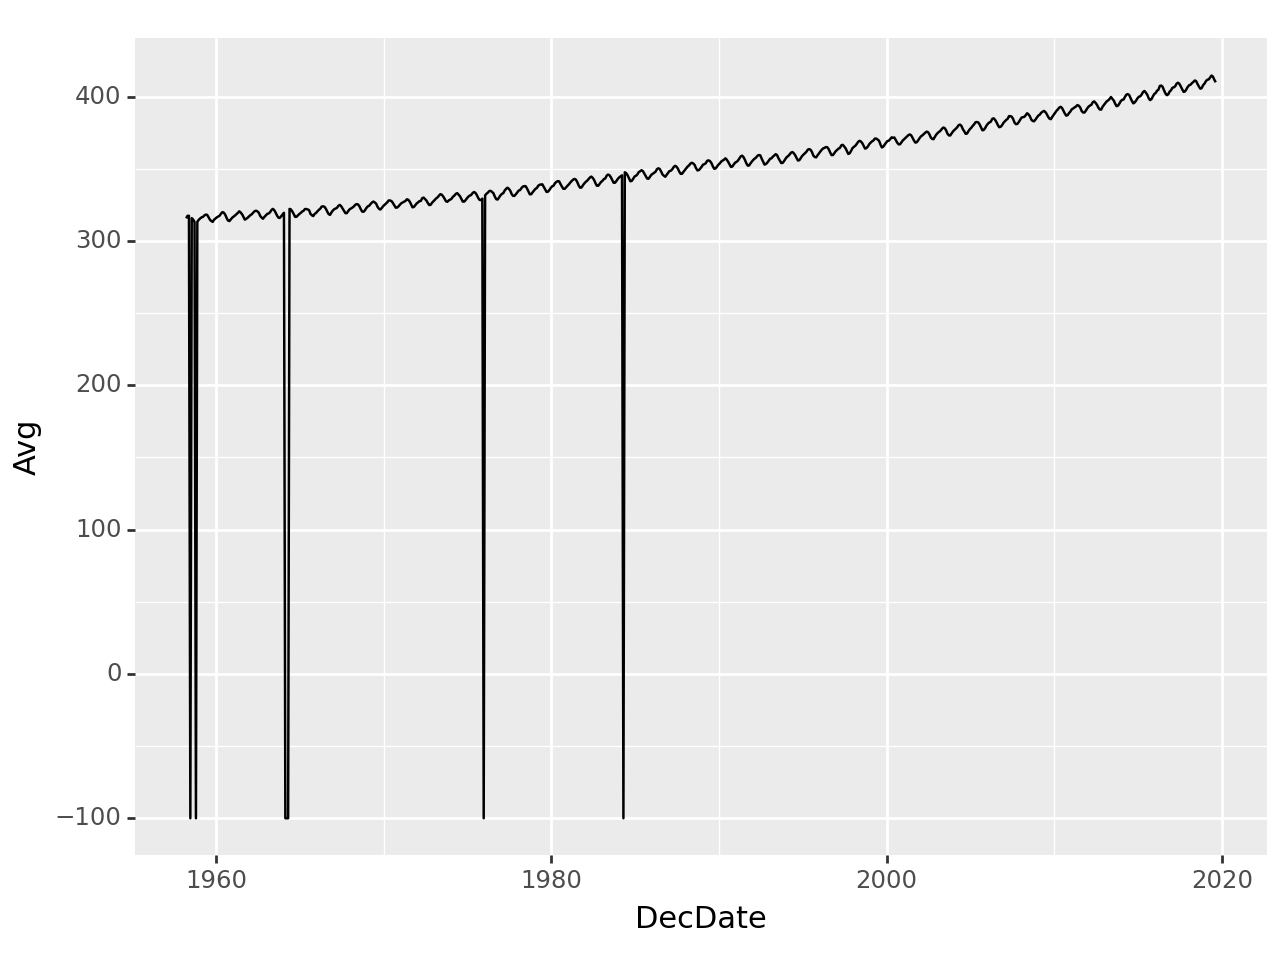

<Figure Size: (640 x 480)>

In [21]:
ggplot(co2, aes(x='DecDate', y ='Avg')) + geom_line()

### Let's consider all of them

- Since we are plotting `Avg` vs `DecDate`, we should just focus on dealing with missing values for `Avg`.

- Let's consider a few options:

  - Drop those records
  - Replace -99.99 with NaN
  - Substitute it with a likely value for the average CO2?

- What do you think are the pros and cons of each possible action?

In [24]:
# 1. Drop missing values
co2_drop = co2[co2['Avg'] > 0]

# 2. Replace NaN with -99.99
co2_NA = co2.replace(-99.99, pd.NA)

#### Imputing the data
- For this dataset, they already provide with a **substitute** value for the -99.99.

- From the file description:

  > The `interpolated` column includes average values from the preceding column (`average`)

- The `Int` feature has values that exactly match those in `Avg`, except when `Avg` is -99.99, and then a **reasonable** estimate is used instead.
- So, the third version of our data will use the `Int` feature instead of `Avg`




In [26]:
# 3. Use interpolated column which estimates missing Avg values
co2_impute = co2.copy()
co2_impute['Avg'] = co2['Int']

### What works best?

- To answer this question, let's zoom in on a short time period, say the measurements in 1958 (where we know we have two missing values).

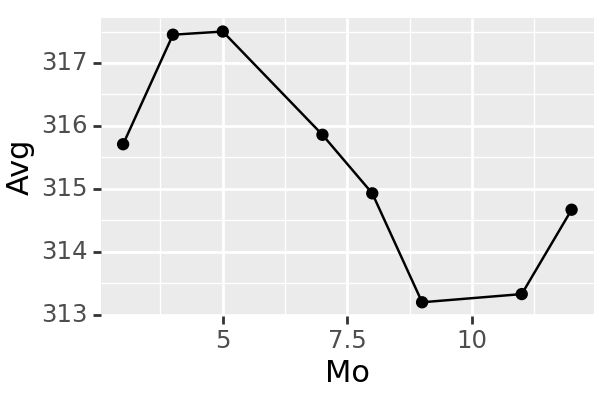

/usr/local/lib/python3.10/dist-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 2 rows containing missing values.


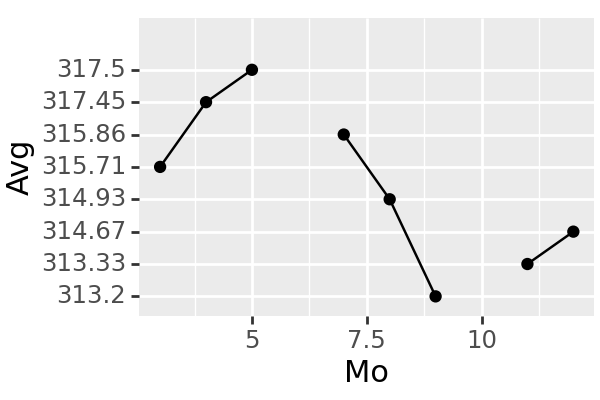

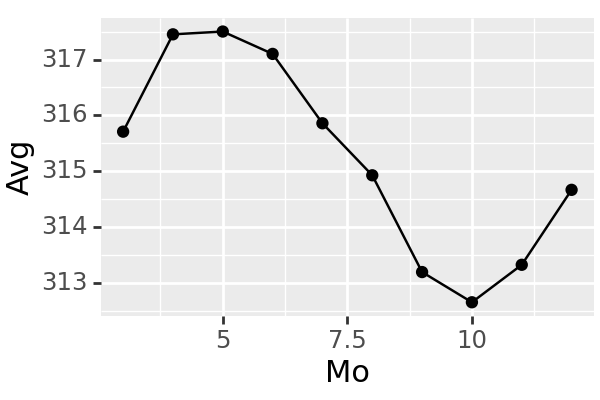

In [34]:
year = 1958

g_drop = (ggplot(co2_drop[co2_drop['Yr']==year], aes('Mo','Avg')) +
          geom_line() + geom_point() + theme(figure_size=[3,2]))
g_NA = (ggplot(co2_NA[co2_NA['Yr']==year], aes('Mo','Avg', group=1)) +  # Need to add group = 1
        geom_line(na_rm=True) + geom_point() + theme(figure_size=[3,2]))
g_impute = (ggplot(co2_impute[co2_impute['Yr']==year], aes('Mo','Avg')) +
            geom_line() + geom_point() + theme(figure_size=[3,2]))

print(g_drop)
print(g_NA)
print(g_impute)

### What can we conclude?

- In the big picture since there are only 7 Avg values missing (<1% of 738 months), any of these approaches would work.

- However there is some appeal to option C: **Imputing**:

  -  Shows seasonal trends for CO2
  -  We are plotting all months in our data as a line plot

### Replot our figures with imputing data

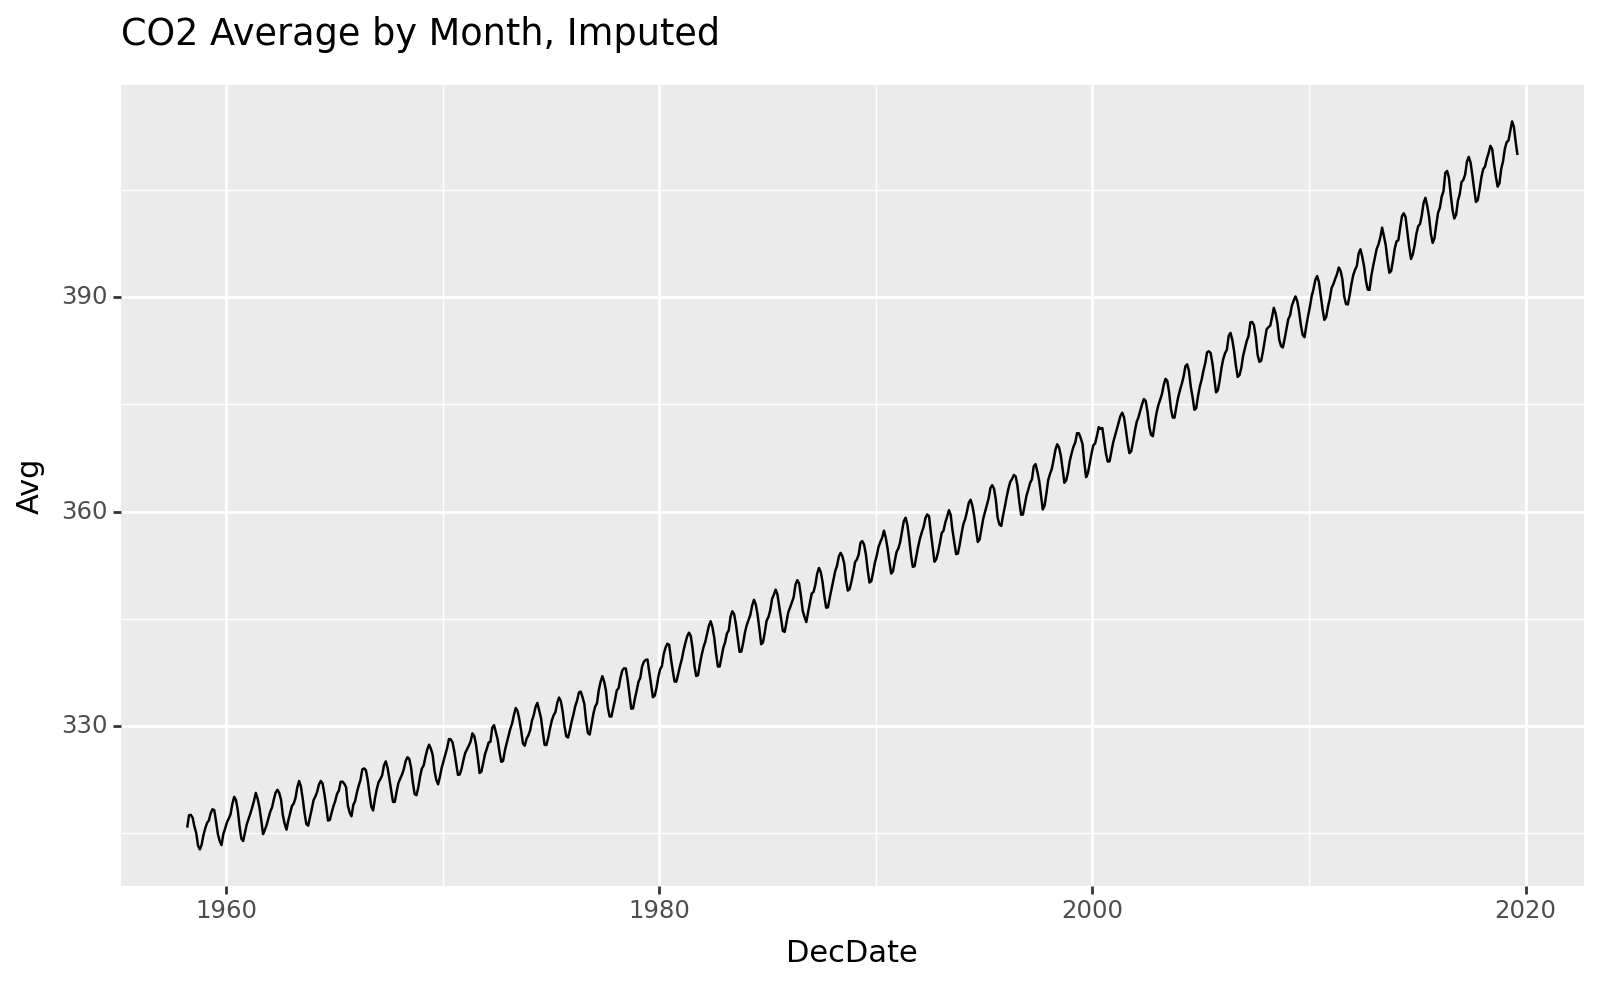

<Figure Size: (800 x 500)>

In [31]:
ggplot(co2_impute, aes(x='DecDate', y ='Avg')) + geom_line() + ggtitle('CO2 Average by Month, Imputed') + theme(figure_size=[8,5])

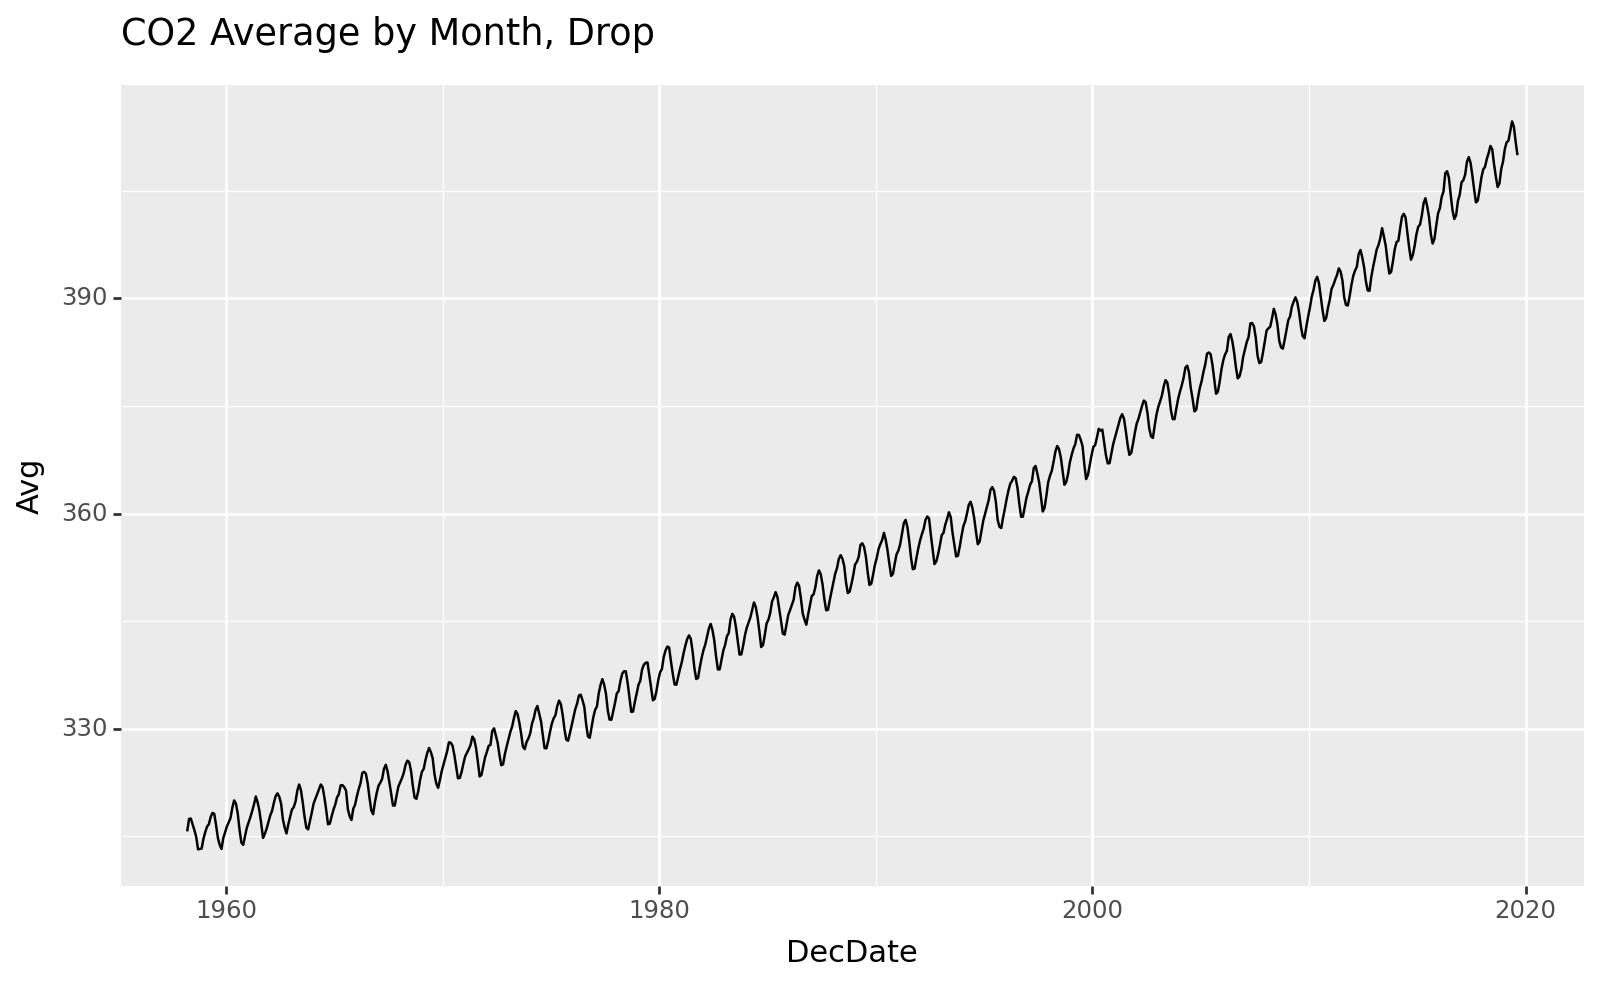

<Figure Size: (800 x 500)>

In [32]:
ggplot(co2_drop, aes(x='DecDate', y ='Avg')) + geom_line() + ggtitle('CO2 Average by Month, Drop') + theme(figure_size=[8,5])

## Presenting the data: A Discussion on Data Granularity

The data you present depends on your research question.

- Q: **How do CO2 levels vary by season?**

  - You might want to keep average monthly data.

- Q: **Are CO2 levels rising over the past 50+ years, consistent with global warming predictions?**

  - You might be happier with a **coarser granularity** of average year data!

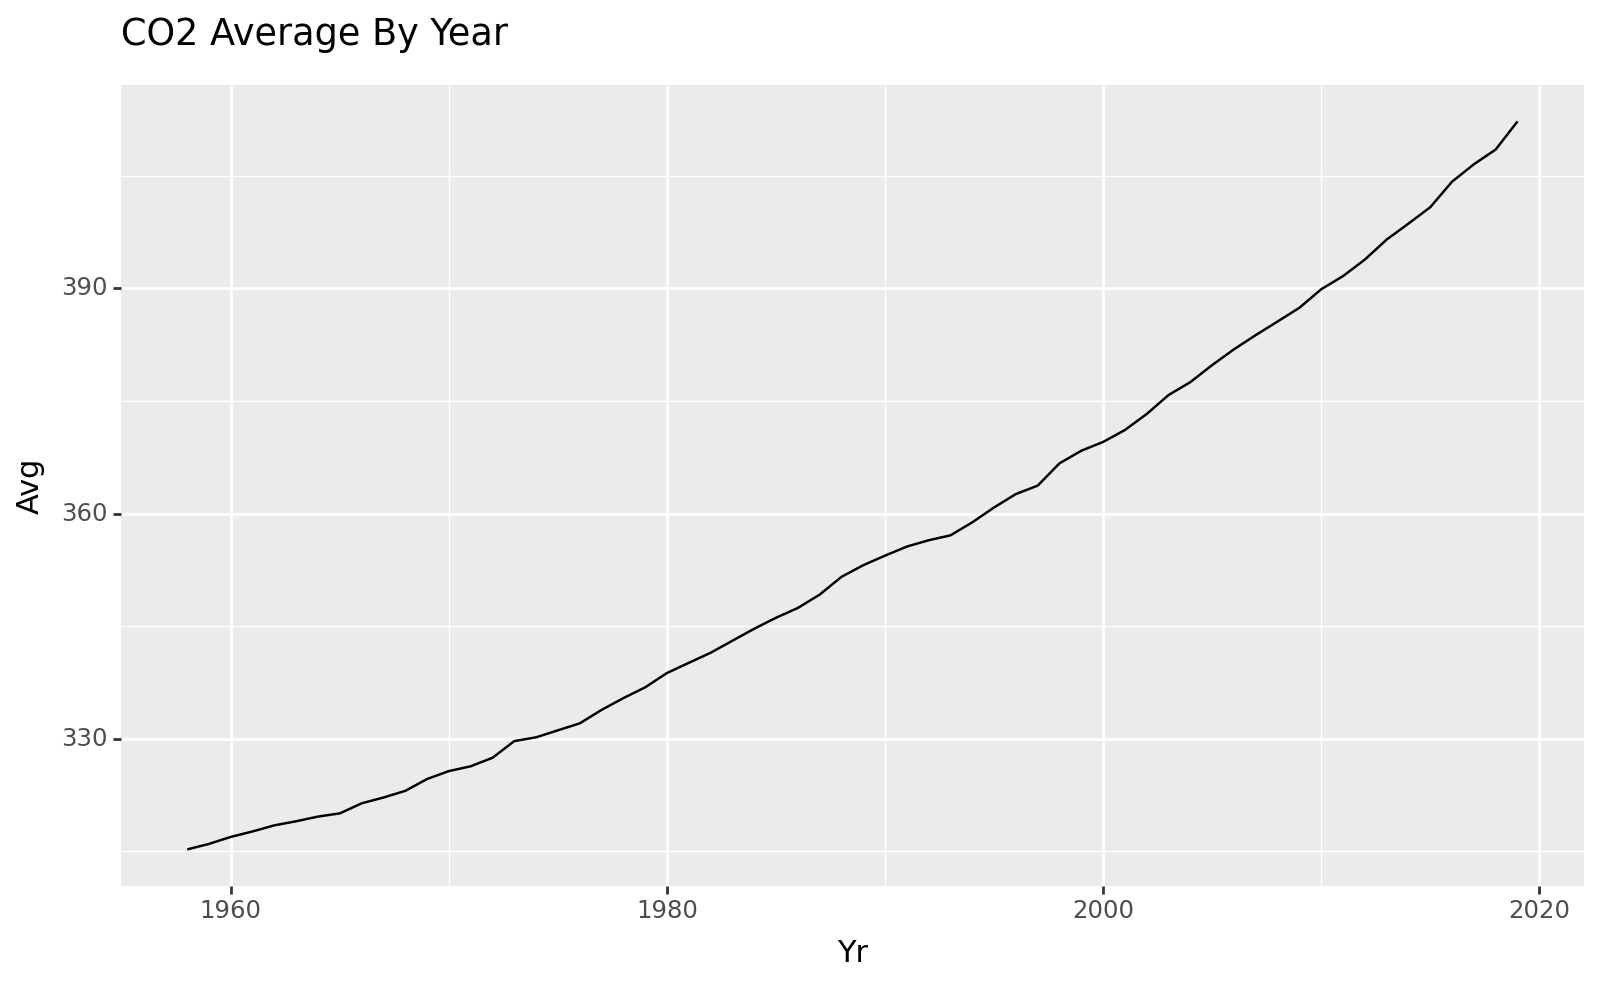

<Figure Size: (800 x 500)>

In [33]:
# Year instead of Month
co2_year = co2_impute.groupby('Yr', as_index=False).mean()

ggplot(co2_year, aes(x='Yr', y ='Avg')) + geom_line() + ggtitle('CO2 Average By Year') + theme(figure_size=[8,5])

- Indeed, we see a rise by nearly 100 ppm of CO2 since Mauna Loa began recording in 1958.

# --- Break Here ---

## Data and where to find them

- Collect them yourself
- Search the internet
- Using APIs
- Scrap from websites

## Web Scraping  with Beautiful Soup and Pandas

- Web Scraping = getting information from websites
- Challenges of Web Scraping:
  - Variety
  - Dynamics
  - Complex Structure
- We will cover two ways to scrap webs: using Beautiful Soup Library and native Pandas method.
- This section is based on two blogposts:
  - https://realpython.com/beautiful-soup-web-scraper-python/#scrape-the-fake-python-job-site
  - https://github.com/Andy-Pham-72/Web-Scraping-with-BeautifulSoup-and-Pandas

### Web scraping with Beautiful Soup

### Step 1: Inspect your Data Source
- We will attempt to scrap this [Fake Python](https://realpython.github.io/fake-jobs/) Job.
- So, first let's explore it!!
- This website is a static html website and won't change.

#### Inspecting the site using developer tools

- Developer tools allow you interactively explore the site’s document object model (DOM) to better understand your source.

- To access dev tool:

  - Mac: Cmd + Alt + I
  - Window/Linux: Ctrl + Shift + I

  - On Chrome/firefox: You can right click -> inspect (or `F11`)
  - On Safari: You may need to enable it in the preferences first.

### Step 2: Scrape HTML Content From a Page

- We need to retrieve the HTML.
- We can use `requests` library.

In [ ]:
import requests

URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

print(page.text) # very long

- This code issues an HTTP GET request to the given URL.
- It retrieves the HTML data that the server sends back and stores that data in a Python object.

### Static vs. Dynamic Websites
- Static websites: The server sends back HTML documents that contains all data.
- Dynamic websites: The server sends back JavaScript that generates websites.
  - We will not talk about this here. You will need a different library to deal with this. (e.g. [Selenium](https://realpython.com/modern-web-automation-with-python-and-selenium/))

### Step 3: Parse HTML Code with Beautiful Soup

- [Beautiful Soup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) is a Python library for **parsing structured data**.

In [2]:
#!pip install beautifulsoup4
from bs4 import BeautifulSoup

In [ ]:
URL = "https://realpython.github.io/fake-jobs/"
page = requests.get(URL)

# Create a Beautiful Soup object that takes the HTML content as its input.
# The second argument is the parser that you want.
soup = BeautifulSoup(page.content, "html.parser")

In [ ]:
soup

#### Find Elements by ID

- In an HTML web page, every element can have an id attribute assigned.
- We can grab a subset of the page by specifying the id.
- In our fake job post website, we can see that the `<div>` that contains all job posts has the id `ResultsContainer`.

```html
<div id="ResultsContainer">
  <!-- all the job listings -->
</div>
```
- To grab this `<div>`, we can use `find` function.

In [ ]:
results = soup.find(id="ResultsContainer") # results is still a soup object

print(results.prettify()) # Pretty printing

### Find Elements by HTML Class Name

- We can also extract HTML by `class`
- We see that every job posting is wrapped in a `<div>` element with the class `card-content`.
- We can use `find_all` function to get an iterable containing all the HTML with our target class.

In [6]:
job_elements = results.find_all("div", class_="card-content")

In [ ]:
# job_elements is an iterable
# Each job_element is another soup object
for job_element in job_elements:
    print(job_element, end="\n"*2)

- We can further extract just a few things that we need such as `title`, `company`, and `location`.

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element)
    print(company_element)
    print(location_element)
    print()

### Extract Text from HTML Elements

- You can add `.text` to get the text content of the HTML elements

In [ ]:
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text)
    print(company_element.text)
    print(location_element.text)
    print()

In [ ]:
# You can strip out the white space
for job_element in job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

### Find Elements by Class Name and Text Content

- We want to filter out all jobs except developer jobs.
- We know that job titles in the page are kept within `<h2>` elements.
- We can pass a function to string argument to find elements that contains the word 'python'.

In [18]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)
print(len(python_jobs))

10


In [19]:
# Let's check out these jobs
for job_element in python_jobs:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

AttributeError: 'NoneType' object has no attribute 'text'

- We got an error!?

In [20]:
python_jobs

[<h2 class="title is-5">Senior Python Developer</h2>,
 <h2 class="title is-5">Software Engineer (Python)</h2>,
 <h2 class="title is-5">Python Programmer (Entry-Level)</h2>,
 <h2 class="title is-5">Python Programmer (Entry-Level)</h2>,
 <h2 class="title is-5">Software Developer (Python)</h2>,
 <h2 class="title is-5">Python Developer</h2>,
 <h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>,
 <h2 class="title is-5">Back-End Web Developer (Python, Django)</h2>,
 <h2 class="title is-5">Python Programmer (Entry-Level)</h2>,
 <h2 class="title is-5">Software Developer (Python)</h2>]

- `python_jobs` do not contain other information!

### Access Parent Elements

- Our python text is under `<div class='card-content>`
- We want to get the parant div instead.
- We can simply use `.parent` to get the parent of the soup object.

<img src= 'https://drive.google.com/thumbnail?id=1Gn7Fam-SFlvs5kqesIiGl_gqFhjlBw4-&sz=w1000' width=600></img>

In [21]:
python_jobs = results.find_all(
    "h2", string=lambda text: "python" in text.lower()
)

python_job_elements = [
    h2_element.parent.parent.parent for h2_element in python_jobs
]

In [ ]:
# Let's check out these jobs
for job_element in python_job_elements:
    title_element = job_element.find("h2", class_="title")
    company_element = job_element.find("h3", class_="company")
    location_element = job_element.find("p", class_="location")
    print(title_element.text.strip())
    print(company_element.text.strip())
    print(location_element.text.strip())
    print()

### Extract Attributes From HTML Elements

- What if we want the link to apply to the job too?
- We can find_all `a` to get the HTML element with link
- But we want the link which will be inside the attribute and not the text.

```html
<a href="https://realpython.github.io/fake-jobs/jobs/senior-python-developer-0.html"
           target="_blank"
           class="card-footer-item">Apply</a>
```
- We can use the square-bracket notation get the attribute.
- Example: `link['href']`

In [ ]:
for job_element in python_job_elements:
    # -- snip --
    links = job_element.find_all("a")
    for link in links:
        link_url = link["href"]
        print(f"Apply here: {link_url}\n")

- There is one problem with this code. It returns all two links within each job.
- We only want the first link.

In [25]:
for job_element in python_job_elements:
    # -- snip --
    links = job_element.find_all("a")[1]['href']
    print(f"Apply here: {link_url}\n")

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html

Apply here: https://realpython.github.io/fake-jobs/jobs/software-developer-python-90.html



- We're done!

## Web Scraping with Pandas
- Pandas provides us with a `read_html()` function to extract tables from html.
- `read_html()` will return a list of all tables in DataFrame.
- [Documentation](https://pandas.pydata.org/docs/reference/api/pandas.read_html.html)

#### Example 1: Wiki Table
- We will scrap the table from this [wiki](https://en.wikipedia.org/wiki/List_of_S%26P_500_companies) page

In [ ]:
url = r'https://en.wikipedia.org/wiki/List_of_S%26P_500_companies'
tables = pd.read_html(url)
tables

In [29]:
tables[0].head()

,Symbol,Security,GICS Sector,GICS Sub-Industry,Headquarters Location,Date added,CIK,Founded
0,MMM,3M,Industrials,Industrial Conglomerates,"Saint Paul, Minnesota",1957-03-04,66740,1902
1,AOS,A. O. Smith,Industrials,Building Products,"Milwaukee, Wisconsin",2017-07-26,91142,1916
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,"North Chicago, Illinois",1957-03-04,1800,1888
3,ABBV,AbbVie,Health Care,Biotechnology,"North Chicago, Illinois",2012-12-31,1551152,2013 (1888)
4,ACN,Accenture,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",2011-07-06,1467373,1989


In [31]:
tables[0]['GICS Sector'].value_counts()

,count
GICS Sector,
Industrials,78
Financials,71
Information Technology,67
Health Care,63
Consumer Discretionary,52
Consumer Staples,38
Utilities,31
Real Estate,31
Materials,28


#### Example 2: NBA Data

- We are going to extract NBA data from [here](https://www.basketball-reference.com/leagues/NBA_2020_per_game.html)


In [37]:
url = 'https://www.basketball-reference.com/leagues/NBA_2020_per_game.html'

df_basketball = pd.read_html(url)[0] # Get the first table

df_basketball.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Steven Adams,C,26,OKC,63,63,26.7,4.5,7.6,...,.582,3.3,6.0,9.3,2.3,0.8,1.1,1.5,1.9,10.9
1,2,Bam Adebayo,PF,22,MIA,72,72,33.6,6.1,11.0,...,.691,2.4,7.8,10.2,5.1,1.1,1.3,2.8,2.5,15.9
2,3,LaMarcus Aldridge,C,34,SAS,53,53,33.1,7.4,15.0,...,.827,1.9,5.5,7.4,2.4,0.7,1.6,1.4,2.4,18.9
3,4,Kyle Alexander,C,23,MIA,2,0,6.5,0.5,1.0,...,NaN,1.0,0.5,1.5,0.0,0.0,0.0,0.5,0.5,1.0
4,5,Nickeil Alexander-Walker,SG,21,NOP,47,1,12.6,2.1,5.7,...,.676,0.2,1.6,1.8,1.9,0.4,0.2,1.1,1.2,5.7


##### Data Cleaning

- We can see from the website that the header repeat itself in every 20 players.

<img src='https://camo.githubusercontent.com/f13ae1c7c8082e4717f06788d102ab73f991bdaf69dc10e700c44969216a44ad/68747470733a2f2f646f63732e676f6f676c652e636f6d2f75633f6578706f72743d646f776e6c6f61642669643d314345517337544e4672344e616b3073514b31305159586c303675586376724c4e' width = 700></img>

In [38]:
df_basketball[df_basketball.Age == 'Age'].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
22,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
53,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
76,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
101,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
130,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


In [45]:
df_basketball_drop = df_basketball.drop(df_basketball[df_basketball['Age'] == 'Age'].index)
# df_basketball_drop = df_basketball[df_basketball['Age'] != 'Age']

df_basketball_drop[df_basketball_drop.Age == 'Age'].head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS


##### Let's look at a data
- Finally, we can check out the data.
- Let's look at Player points per game, `PTS`.

<ipython-input-46-7f8f10485fa8>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.10/dist-packages/plotnine/stats/stat_bin.py:109: PlotnineWarning: 'stat_bin()' using 'bins = 19'. Pick better value with 'binwidth'.


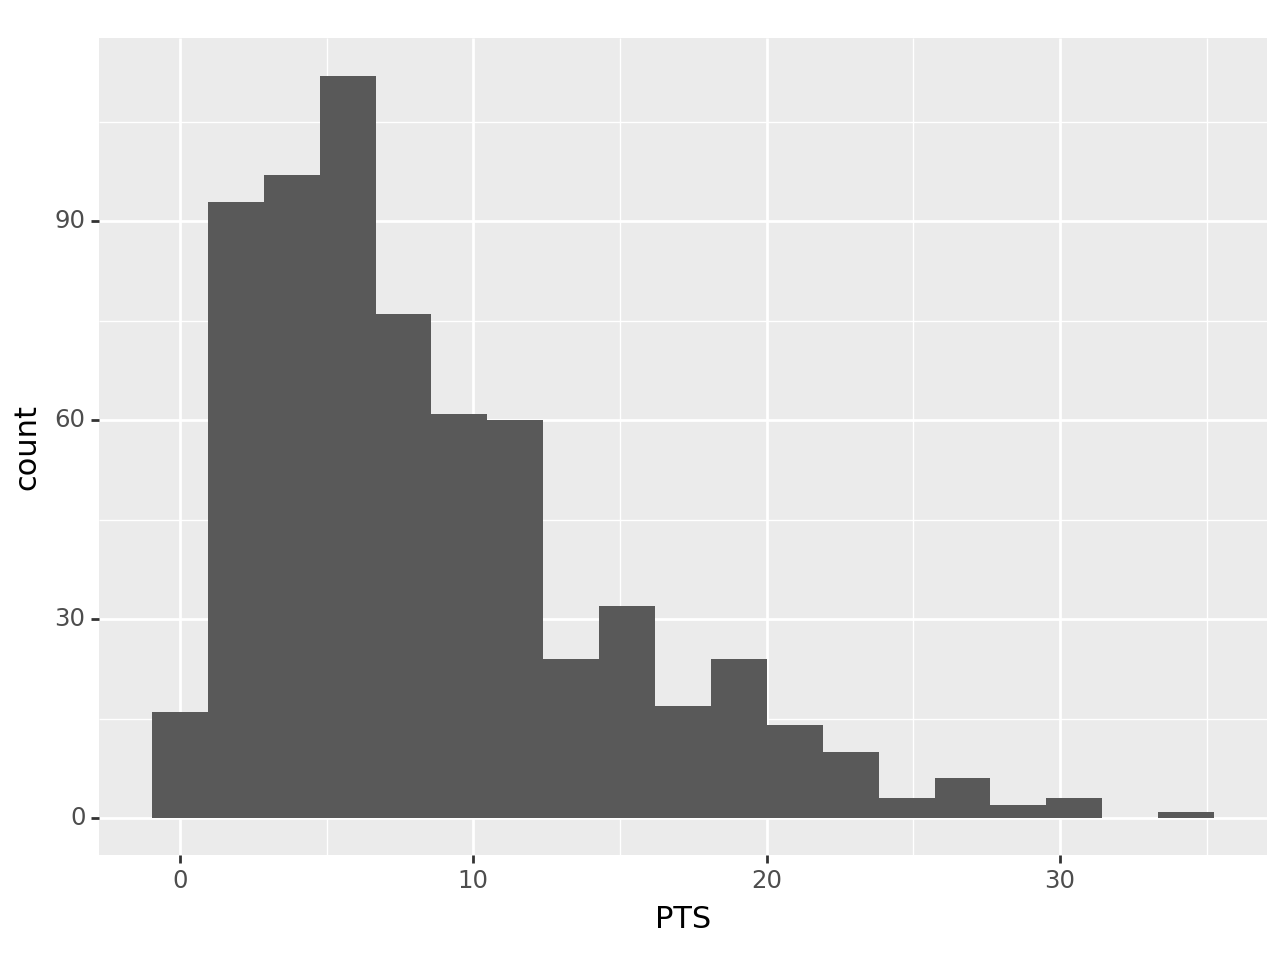

<Figure Size: (640 x 480)>

In [46]:
# need to convert to float
df_basketball_drop['PTS'] = df_basketball_drop['PTS'].astype('float')
ggplot(df_basketball_drop, aes(x='PTS')) + geom_histogram()

# Midterm

- 2 hours